<a href="https://colab.research.google.com/github/MaryamAshraff2/unsupervised-housing-clustering/blob/main/dbscan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import DBSCAN
from IPython import get_ipython
from IPython.display import display

In [22]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

Saving housing - housing (1).csv to housing - housing (1).csv


In [23]:
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [24]:
# Display basic information
display(df.info())
# Display descriptive statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


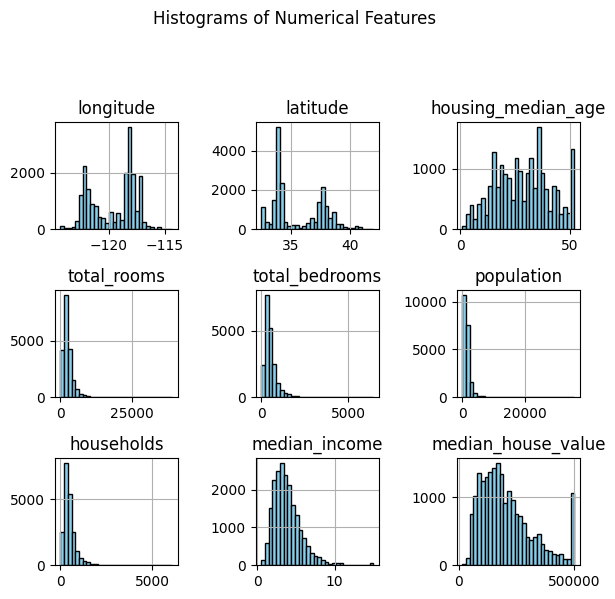

In [25]:
# Plotting histograms for numerical features
df.hist(bins=30, figsize=(6, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

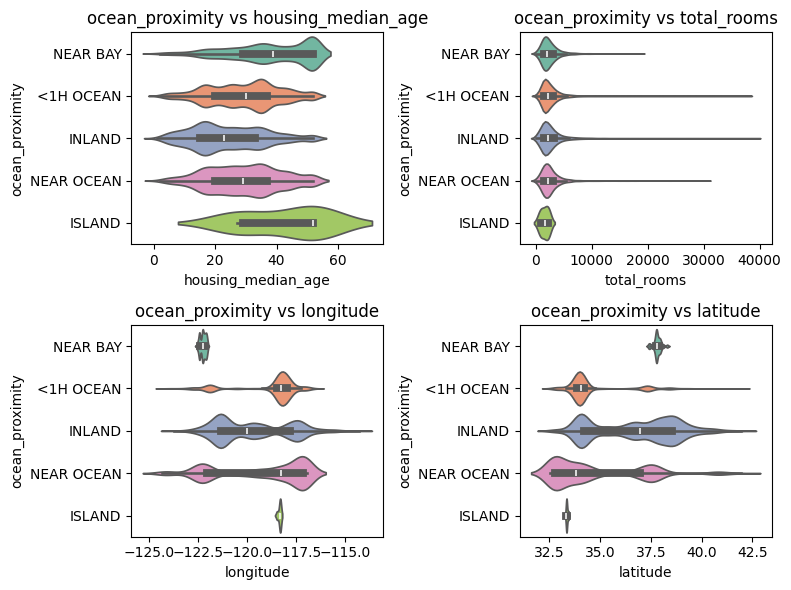

In [27]:
violin_features = ['housing_median_age', 'total_rooms', 'longitude', 'latitude']

plt.figure(figsize=(8, 6))
for i, feature in enumerate(violin_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x=feature, y='ocean_proximity', palette='Set2')
    plt.title(f'ocean_proximity vs {feature}')
plt.tight_layout()
plt.show()

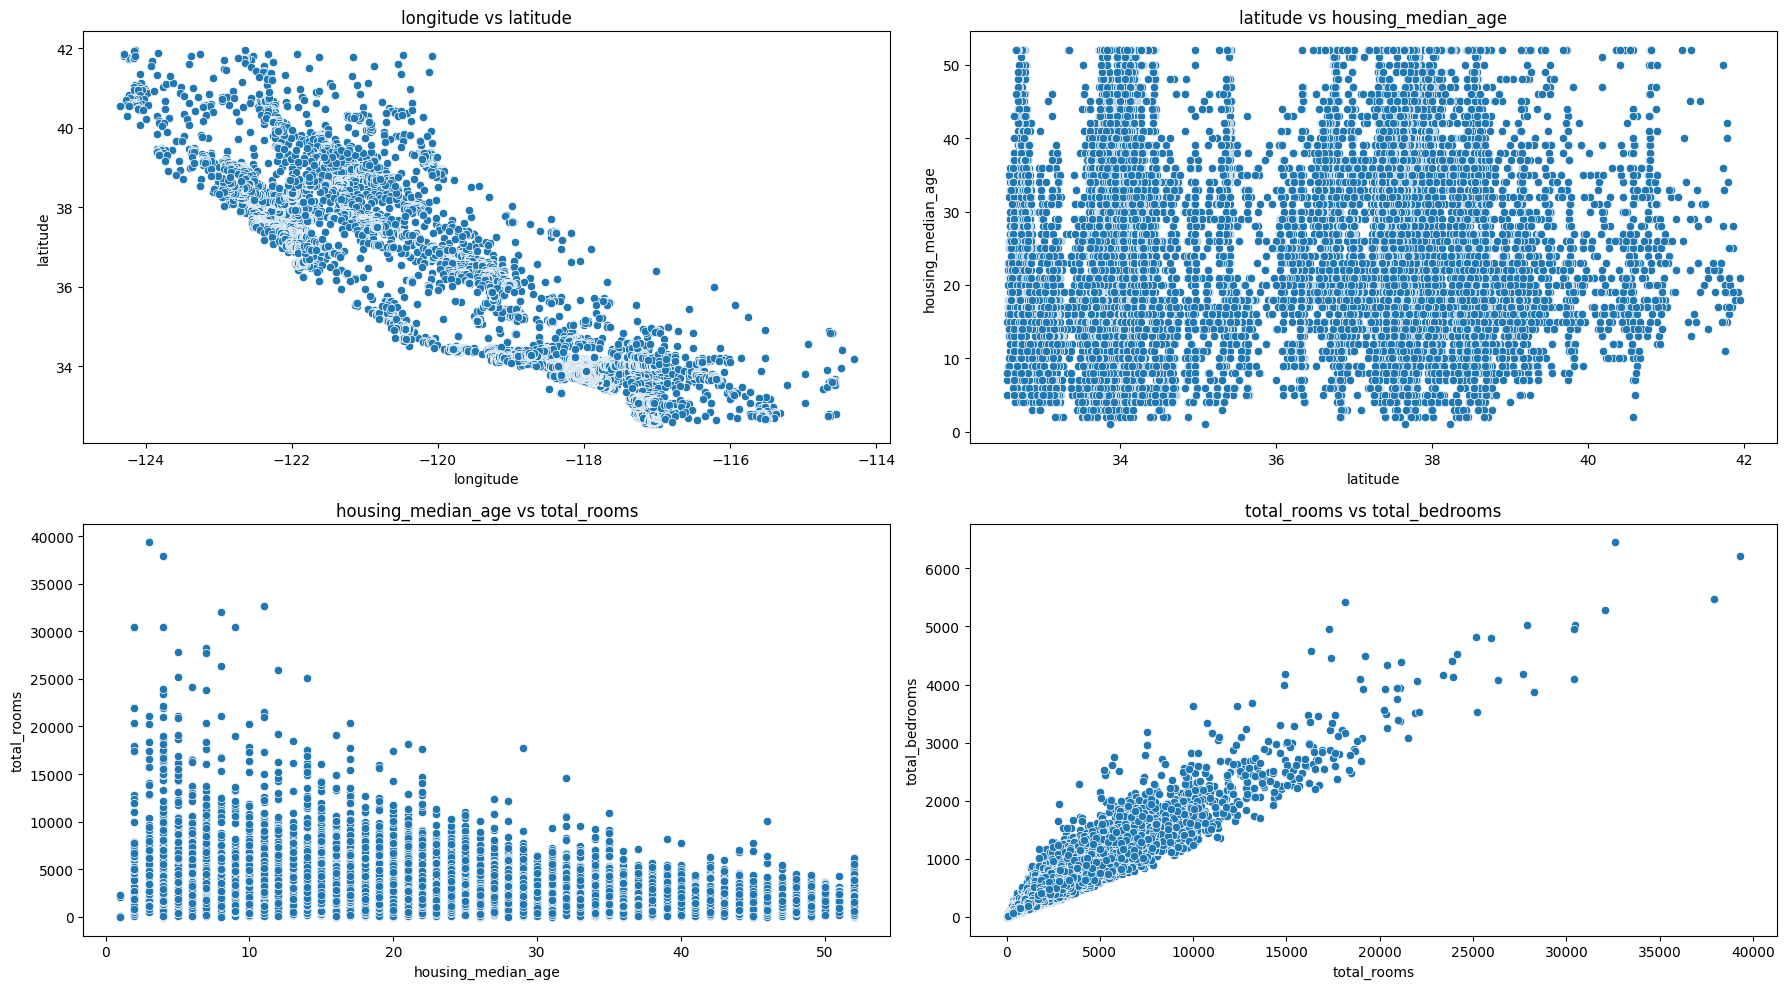

In [28]:
scatter_pairs = [
    ('longitude', 'latitude'),
    ('latitude', 'housing_median_age'),
    ('housing_median_age', 'total_rooms'),
    ('total_rooms', 'total_bedrooms')
]

plt.figure(figsize=(18, 10))
for i, (x, y) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

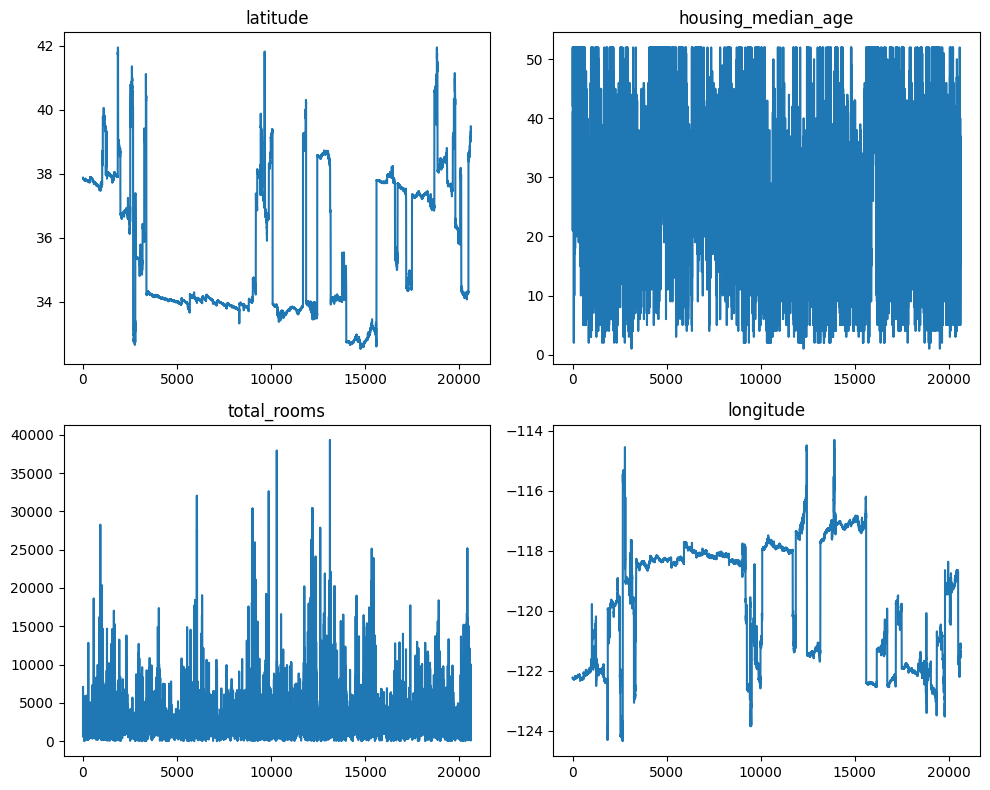

In [29]:
line_features = ['latitude', 'housing_median_age', 'total_rooms', 'longitude']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(line_features):
    plt.subplot(2, 2, i+1)
    plt.plot(df[feature])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

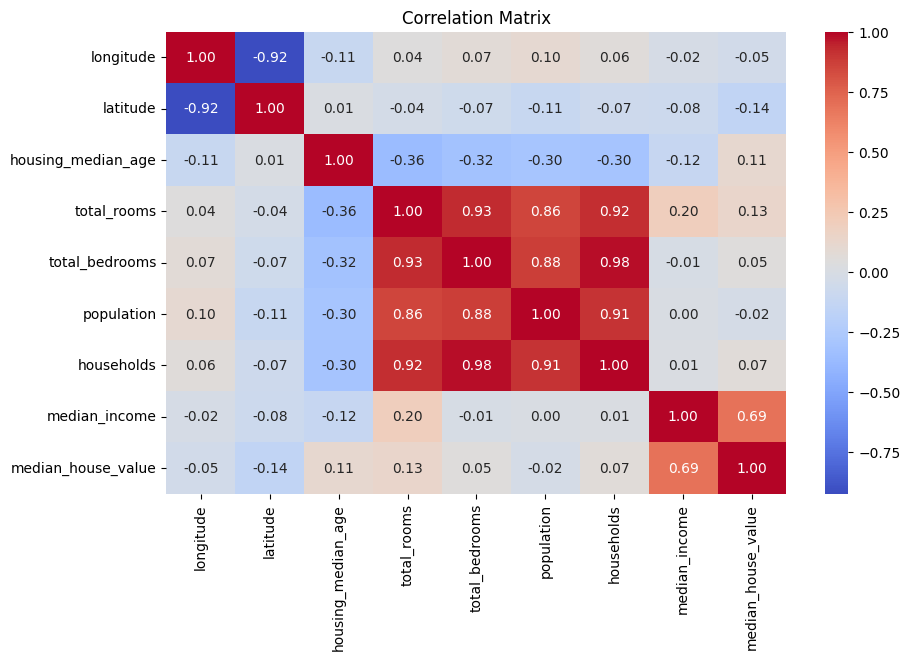

In [31]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Data Preprocessing**

In [32]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(exclude=['object'])
# Handle missing values in numerical features (e.g., using mean imputation)
for col in numerical_features.columns:
    df[col].fillna(df[col].mean(), inplace=True)
# Handle missing values in categorical features (e.g., using mode imputation)
for col in categorical_features.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_features.columns, drop_first=True)
# Scale numerical features (e.g., using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features.columns] = scaler.fit_transform(df[numerical_features.columns])

In [33]:
# Display the preprocessed dataframe
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,False,False,True,False


In [34]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

None

In [35]:
display(df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.526513e-15,-1.079584e-15,5.508083e-18,3.201573e-17,1.927829e-16,-1.101617e-17,6.885104e-17,6.609700e-17,-9.363741e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.280530e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.745184e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.382088e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.513484e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.408954e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00


**Select Features for Clustering and Normalize the Data**

In [37]:
selected_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df_selected = df[selected_features]

In [39]:
print("Selected Features for Clustering:")
selected_features

Selected Features for Clustering:


['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [40]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)

**Apply DBSCAN**

In [41]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples
clusters = dbscan.fit_predict(df_normalized)

In [42]:
df['DBSCAN_Cluster'] = clusters

In [43]:
if len(selected_features) == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='DBSCAN_Cluster', data=df, palette='viridis', legend='full')
    plt.title('DBSCAN Clustering Results')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

In [44]:
display(df.head())
display(df['DBSCAN_Cluster'].value_counts())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,DBSCAN_Cluster
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,False,False,True,False,-1
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,False,False,True,False,-1
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,False,False,True,False,-1
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,False,False,True,False,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,False,False,True,False,0


,count
DBSCAN_Cluster,
0,13091
-1,6976
56,46
9,37
50,22
...,...
64,3
75,3
70,3


**Visualize Clusters**

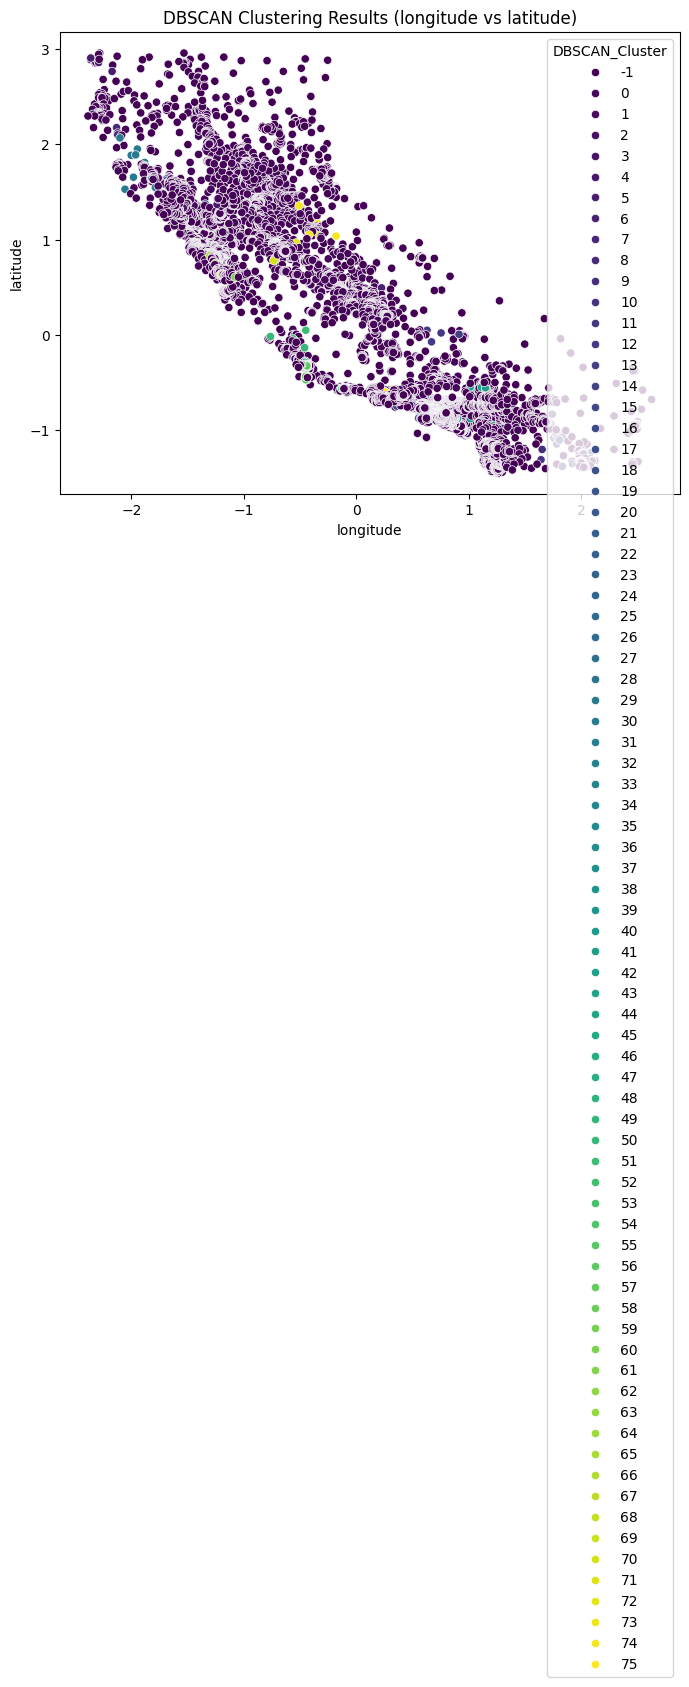

In [46]:
feature_to_visualize_1 = 'longitude'
feature_to_visualize_2 = 'latitude'

if feature_to_visualize_1 in df.columns and feature_to_visualize_2 in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature_to_visualize_1, y=feature_to_visualize_2, hue='DBSCAN_Cluster', data=df, palette='viridis', legend='full')
    plt.title(f'DBSCAN Clustering Results ({feature_to_visualize_1} vs {feature_to_visualize_2})')
    plt.xlabel(feature_to_visualize_1)
    plt.ylabel(feature_to_visualize_2)
    plt.show()
else:
    print(f"Selected features for visualization ({feature_to_visualize_1}, {feature_to_visualize_2}) not found in the DataFrame.")

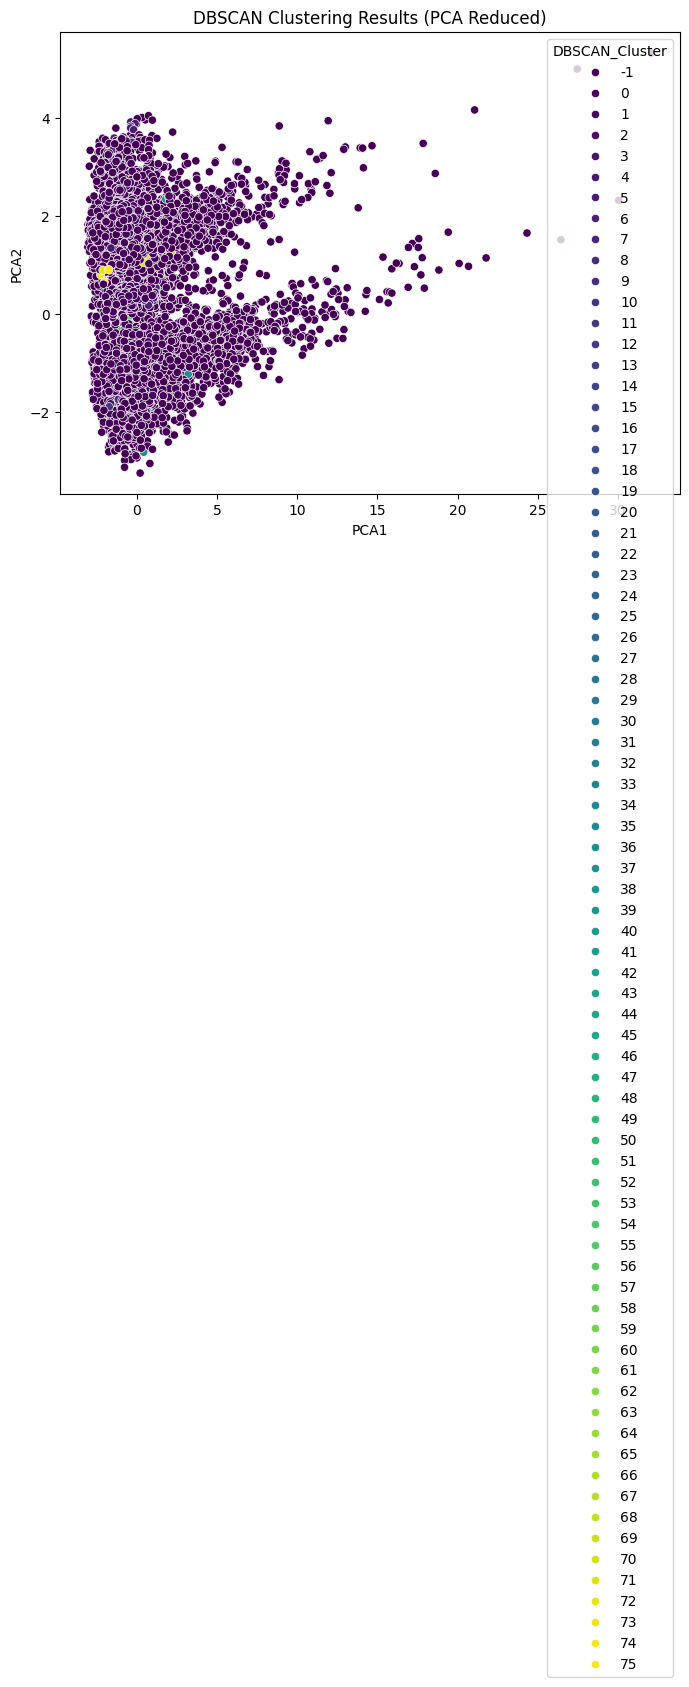

In [45]:
from sklearn.decomposition import PCA

if len(selected_features) > 2:
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_normalized)
    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['DBSCAN_Cluster'] = clusters

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_pca, palette='viridis', legend='full')
    plt.title('DBSCAN Clustering Results (PCA Reduced)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
else:
    print("PCA visualization requires more than 2 selected features.")